In [1]:
import cv2, os, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
path = 'dataset/dogs-vs-cats/train'

In [4]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [5]:
dog_path = os.path.join(path, 'dog.5*')
cat_path = os.path.join(path, 'cat.5*')

In [6]:
len(glob(dog_path))

1111

In [8]:
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
print('All dog images loaded')

All dog images loaded


In [9]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
print('All cat images loaded')

All cat images loaded


In [10]:
classes = ['dog', 'cat']

In [11]:
def shows(label):
    plt.figure(figsize=(12, 8))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = image.array_to_img(random.choice(label))
        plt.imshow(img, cmap=plt.get_cmap('gray'))

        plt.axis('off')
        if label == 'dog':
            class_num = 0
        else:
            class_num = 1
        plt.title('It should be a {}'.format(classes[class_num]))
    plt.show()

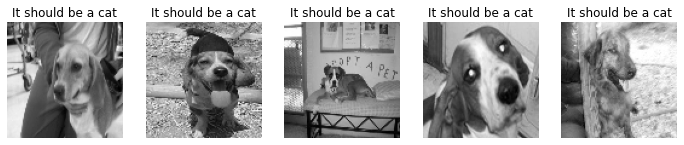

In [12]:
shows(dogs)

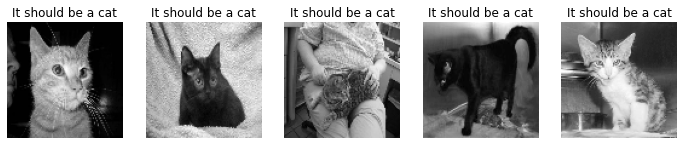

In [13]:
shows(cats)

In [14]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [15]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [16]:
x_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [1]:
x_train.shape, y_train.shape

NameError: name 'x_train' is not defined

In [18]:
y_train = tf.keras.utils.to_categorical(y_train, 2)

In [31]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
y_train.shape

(2222, 2)

In [20]:
model = Sequential([
    Conv2D(128, kernel_size=(3, 3), input_shape=(96, 96, 1), activation='relu'),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 128)       1280      
_________________________________________________________________
dropout (Dropout)            (None, 94, 94, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        73792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 92, 92, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Nadam(),
             metrics = ['accuracy'])

In [23]:
early_stopping_cb = EarlyStopping(patience=50)

In [24]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stopping_cb])

Train on 1777 samples, validate on 445 samples
Epoch 1/1000
1777/1777 [==============================] - 74s 42ms/sample - loss: 1.0478 - accuracy: 0.6117 - val_loss: 0.7580 - val_accuracy: 0.0000e+00
Epoch 2/1000
1777/1777 [==============================] - 74s 41ms/sample - loss: 0.6684 - accuracy: 0.6258 - val_loss: 0.8175 - val_accuracy: 0.0315
Epoch 3/1000
1777/1777 [==============================] - 77s 43ms/sample - loss: 0.6646 - accuracy: 0.6252 - val_loss: 0.7687 - val_accuracy: 0.0247
Epoch 4/1000
1777/1777 [==============================] - 75s 42ms/sample - loss: 0.6535 - accuracy: 0.6348 - val_loss: 0.9770 - val_accuracy: 0.0517
Epoch 5/1000
1777/1777 [==============================] - 75s 42ms/sample - loss: 0.6600 - accuracy: 0.6325 - val_loss: 0.8198 - val_accuracy: 0.0494
Epoch 6/1000
1777/1777 [==============================] - 77s 43ms/sample - loss: 0.6342 - accuracy: 0.6404 - val_loss: 0.9947 - val_accuracy: 0.0539
Epoch 7/1000
1777/1777 [=========================

In [30]:
model.evaluate(x_train , y_train, verbose=0)[1]

0.8712871